In [29]:
import numpy as np
import pandas as pd
import glob 
import csv
import traceback
import datetime
import os
pd.options.display.max_columns=50

In [30]:
def firstCheck(df):
    """ Sorting and indexing necessary for data preparation """
    df = df.dropna(subset=["illicit"])
    df = df.sort_values("sgd.date")
    df = df.reset_index(drop=True)
    return df

dfs = firstCheck(pd.read_csv('../data/synthetic-imports-declarations.csv'))

In [31]:
for df in [dfs]:
    print(df['importer.id'].nunique(), df['tariff.code'].nunique(), df['country'].nunique())

8653 1894 112


In [32]:
dfs

,sgd.id,sgd.date,importer.id,declarant.id,country,office.id,tariff.code,quantity,gross.weight,fob.value,cif.value,total.taxes,illicit,revenue
0,SGD1,13-01-02,IMP826164,DEC3207,CNTRY680,OFFICE92,8703241128,1581,26494,2390,2809,647,0,0
1,SGD196,13-01-02,IMP271968,DEC5544,CNTRY680,OFFICE92,8703900000,1,328548,8852,8852,3140,0,0
2,SGD195,13-01-02,IMP717735,DEC2596,CNTRY759,OFFICE51,3004900000,21,34542,6746,8891,3662,0,0
3,SGD194,13-01-02,IMP116006,DEC1243,CNTRY680,OFFICE51,8703321922,1,25243,28554,34757,3585,0,0
4,SGD193,13-01-02,IMP712264,DEC9013,CNTRY376,OFFICE51,8703231119,259,204486,3586,4440,2442,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,SGD99816,13-12-31,IMP442440,DEC7804,CNTRY378,OFFICE51,5801900000,4,124936,154031,202095,9297,1,602
99996,SGD99815,13-12-31,IMP306228,DEC7336,CNTRY264,OFFICE60,3206190000,1,87904,621548,857565,1164,1,869
99997,SGD99814,13-12-31,IMP245658,DEC8312,CNTRY976,OFFICE66,8704221100,61,39895,955688,1096716,352,0,0
99998,SGD99820,13-12-31,IMP302697,DEC6832,CNTRY376,OFFICE59,8703232926,1,28235,144152,208523,11881,0,0


In [33]:
dfs[dfs['importer.id'] == 'IMP826164']['tariff.code'].value_counts()

8703241128    174
8703232926    138
8703222900     79
8703900000     78
8703321922     77
             ... 
8413300000      1
5007900000      1
7005210000      1
2915700000      1
3215190019      1
Name: tariff.code, Length: 99, dtype: int64

In [63]:
dfs['importer.id'].value_counts()

IMP826164    1077
IMP173637     884
IMP450852     859
IMP243951     782
IMP238427     714
             ... 
IMP780776       1
IMP995050       1
IMP486944       1
IMP417319       1
IMP247045       1
Name: importer.id, Length: 8653, dtype: int64

In [69]:
for impid in dfs['importer.id'].value_counts().head(100).keys():
    firstday = min(df[df['importer.id'] == impid]['sgd.date'])
    print(firstday)

13-01-02
13-01-02
13-01-03
13-01-02
13-01-02
13-01-04
13-01-02
13-01-02
13-01-02
13-01-02
13-01-02
13-01-02
13-01-04
13-01-02
13-01-02
13-01-02
13-01-02
13-01-02
13-01-02
13-01-02
13-01-02
13-01-02
13-01-02
13-01-02
13-01-02
13-01-07
13-01-02
13-01-02
13-01-04
13-01-02
13-01-02
13-01-02
13-01-02
13-01-02
13-01-04
13-01-03
13-01-02
13-01-02
13-01-02
13-01-02
13-01-03
13-01-02
13-01-02
13-01-02
13-01-02
13-01-04
13-01-02
13-01-02
13-01-02
13-01-03
13-01-02
13-01-02
13-01-02
13-01-03
13-01-02
13-01-02
13-01-02
13-01-03
13-01-02
13-01-03
13-01-02
13-01-02
13-01-02
13-01-02
13-01-02
13-01-02
13-01-02
13-01-07
13-01-07
13-01-02
13-01-03
13-01-02
13-01-04
13-01-03
13-01-02
13-01-07
13-01-02
13-01-02
13-01-02
13-01-02
13-01-02
13-01-03
13-01-07
13-01-03
13-01-02
13-01-03
13-01-04
13-01-03
13-01-02
13-01-02
13-01-08
13-01-04
13-01-03
13-01-04
13-01-03
13-01-03
13-01-04
13-01-03
13-01-02
13-01-08


In [35]:
dfs['country'].value_counts()

CNTRY680    29518
CNTRY759    19170
CNTRY376    10877
CNTRY615     4055
CNTRY454     3260
            ...  
CNTRY415      109
CNTRY252      107
CNTRY379      106
CNTRY343      101
CNTRY278       99
Name: country, Length: 112, dtype: int64

In [36]:
dfs['tariff.code'].apply(lambda x: x//100000000).value_counts()

87    67556
85     6922
84     4814
39     1773
73     1757
      ...  
97        8
46        5
5         4
93        4
1         2
Name: tariff.code, Length: 91, dtype: int64

In [37]:
dfs['HS2'] = dfs['tariff.code'].apply(lambda x: x//100000000)

In [38]:
dfs.groupby(['HS2'])['illicit'].apply(np.mean)

HS2
1     0.000000
2     0.320000
3     0.123418
4     0.187192
5     0.500000
        ...   
93    0.500000
94    0.213115
95    0.256098
96    0.251748
97    0.500000
Name: illicit, Length: 91, dtype: float64

#### Average illicit rates

In [94]:
# Synthetic

date_begin = '20130101'
test_length = 7

start_day = datetime.date(int(date_begin[:4]), int(date_begin[4:6]), int(date_begin[6:8]))
period = datetime.timedelta(days=test_length)    
end_day = start_day + datetime.timedelta(days=test_length)    

old_IID = set()
new_proportions = []

avg_illicit_rates_s = []
num_trades_s = []
num_HS2_type_s = []
avg_prices = []

for week in range(52):
    weekly_trade = dfs[(dfs['sgd.date'] < end_day.strftime('%y-%m-%d')) & (dfs['sgd.date'] >= start_day.strftime('%y-%m-%d'))]
    start_day = end_day
    end_day = start_day + datetime.timedelta(days=test_length)
    avg_illicit_rates_s.append(np.mean(weekly_trade['illicit']))
    num_trades_s.append(len(weekly_trade))
    num_HS2_type_s.append(weekly_trade['HS2'].nunique())
    avg_prices.append(np.mean(weekly_trade['fob.value']))

In [95]:
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [96]:
avg_illicit_rates_s = np.nan_to_num(np.array(avg_illicit_rates_s), nan=np.mean(dfs['illicit']))

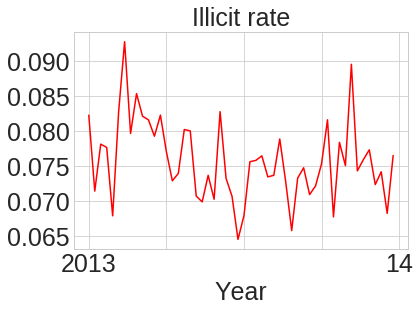

In [102]:
plt.style.use('seaborn-whitegrid')
f = plt.figure()
plt.plot(pd.Series(avg_illicit_rates_s).rolling(1).mean(), color='red')
plt.title('Illicit rate', fontsize=25)
plt.xlabel('Year', fontsize=25)
# plt.ylabel('Illicit rate', fontsize=25)
plt.xticks(ticks=[0,13,26,39,52], labels=['2013','','','','14'], fontsize=25)
plt.yticks(fontsize=25)
f.savefig("illicit_rate_s.pdf", bbox_inches='tight')

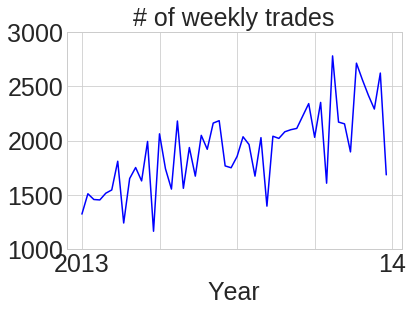

In [115]:
plt.style.use('seaborn-whitegrid')
f = plt.figure()
plt.plot(pd.Series(num_trades_s).rolling(1).mean(), color='blue')
plt.title('# of weekly trades', fontsize=25)
plt.xlabel('Year', fontsize=25)
# plt.ylabel('# of daily trade', fontsize=25)
plt.xticks(ticks=[0,13,26,39,52], labels=['2013', '','','',14], fontsize=25)
plt.yticks(ticks=[1000,1500,2000,2500,3000], labels=[1000,1500,2000,2500,3000], fontsize=25)
f.savefig("num_weekly_trades_s.pdf", bbox_inches='tight')

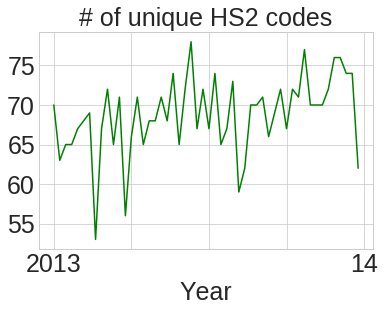

In [117]:
plt.style.use('seaborn-whitegrid')
f = plt.figure()
plt.plot(pd.Series(num_HS2_type_s).rolling(1).mean(), color='green')
plt.title('# of unique HS2 codes', fontsize=25)
plt.xlabel('Year', fontsize=25)
# plt.ylabel('# of unique HS2', fontsize=25)
plt.xticks(ticks=[0,13,26,39,52], labels=['2013', '','','',14], fontsize=25)
plt.yticks(ticks=[55,60,65,70,75], labels=[55,60,65,70,75], fontsize=25)
f.savefig("num_HS2_s.pdf", bbox_inches='tight')

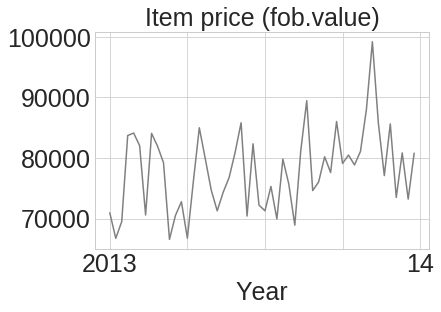

In [116]:
plt.style.use('seaborn-whitegrid')
f = plt.figure()
plt.plot(pd.Series(avg_prices).rolling(1).mean(), color='gray')
plt.title('Item price (fob.value)', fontsize=25)
plt.xlabel('Year', fontsize=25)
# plt.ylabel('Average fob.value', fontsize=25)
plt.xticks(ticks=[0,13,26,39,52], labels=['2013', '','','',14], fontsize=25)
plt.yticks(ticks=[70000,80000,90000,100000], labels=[70000,80000,90000,100000], fontsize=25)
f.savefig("average_prices_s.pdf", bbox_inches='tight')

In [56]:
date_begin = '20130101'
test_length = 7

start_day = datetime.date(int(date_begin[:4]), int(date_begin[4:6]), int(date_begin[6:8]))
period = datetime.timedelta(days=test_length)    
end_day = start_day + datetime.timedelta(days=test_length)    

old_IID = set()
new_proportions = []

novel_rate_s = []

for week in range(52):
    weekly_trade = dfs[(dfs['sgd.date'] < end_day.strftime('%y-%m-%d')) & (dfm['sgd.date'] >= start_day.strftime('%y-%m-%d'))]
    start_day = end_day
    end_day = start_day + datetime.timedelta(days=test_length)
    new_trade = weekly_trade[~weekly_trade['importer.id'].isin(old_IID)]
    old_IID = old_IID.union(weekly_trade['importer.id'].values)
    try:
        novel_rate = sum(new_trade['illicit'])/len(weekly_trade)
    except:
        novel_rate = np.nan
    novel_rate_s.append(novel_rate)
print(novel_rate_s)
novel_rate_s = np.nan_to_num(np.array(novel_rate_s), nan=0)

/home/sundong/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


[0.0823262839879154, 0.050867743865948535, 0.04826732673267327, 0.037673130193905814, 0.0319091400757166, 0.04608853850818678, 0.056896551724137934, 0.028118240807498196, 0.03768506056527591, 0.03613744075829384, 0.03943661971830986, 0.03377218088151116, 0.028201219512195123, 0.027341477603257707, 0.022232962783953602, 0.020895522388059702, 0.022, 0.01671850699844479, 0.010522959183673469, 0.013040712468193385, 0.011915140947399011, 0.0088339222614841, 0.014340871483728626, 0.008387698042870456, 0.006850781417255406, 0.005213505461767627, 0.006398537477148081, 0.01011804384485666, 0.014399393709738537, 0.013426156141223273, 0.015133876600698487, 0.016145307769929364, 0.014991181657848324, 0.011224489795918367, 0.012295081967213115, 0.011842105263157895, 0.009913258983890954, 0.009549795361527967, 0.008802816901408451, 0.009950248756218905, 0.016317016317016316, nan, 0.00554016620498615, 0.013793103448275862, 0.0, 0.0, 0.008298755186721992, 0.015221707478491065, 0.008053691275167786, 0.

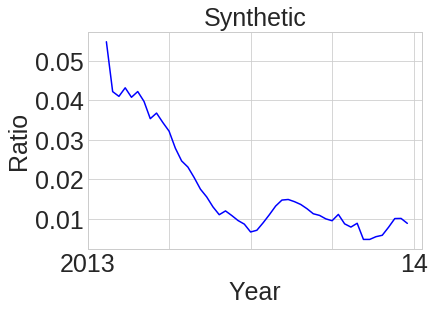

In [57]:
plt.style.use('seaborn-whitegrid')
f = plt.figure()
plt.plot(pd.Series(novel_rate_s).rolling(4).mean(), color='blue')
plt.title('Synthetic', fontsize=25)
plt.xlabel('Year', fontsize=25)
plt.ylabel('Ratio', fontsize=25)
plt.xticks(ticks=[0,13,26,39,52], labels=['2013', '','','',14], fontsize=25)
plt.yticks(fontsize=25)
f.savefig("proportion-of-novel-frauds-from-new-importer-s.pdf", bbox_inches='tight')

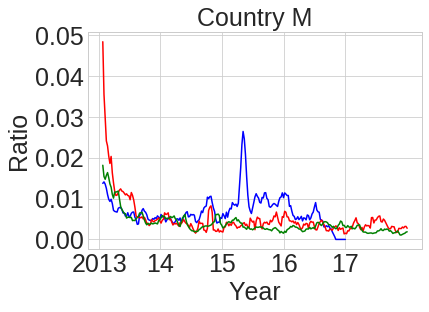

In [161]:
plt.style.use('seaborn-whitegrid')
f = plt.figure()
plt.plot(pd.Series(novel_rate_m).rolling(4).mean(), color='blue')
plt.plot(pd.Series(novel_rate_t).rolling(4).mean(), color='red')
plt.plot(pd.Series(novel_rate_n).rolling(4).mean(), color='green')
plt.title('Country M', fontsize=25)
plt.xlabel('Year', fontsize=25)
plt.ylabel('Ratio', fontsize=25)
plt.xticks(ticks=[0,51,103,155,207], labels=['2013', 14, 15, 16,17], fontsize=25)
plt.yticks(fontsize=25)
f.savefig("proportion-of-novel-frauds-from-new-importer-mnt.pdf", bbox_inches='tight')